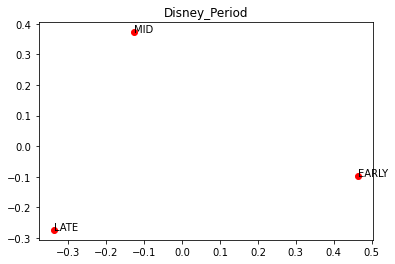

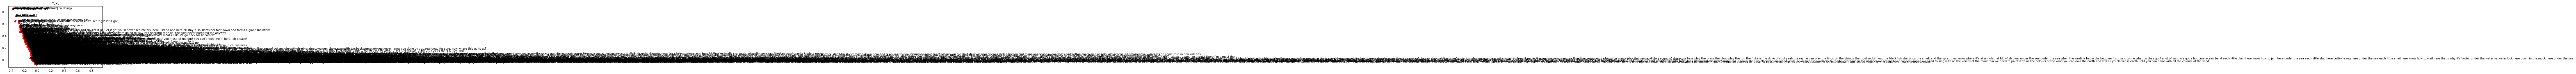

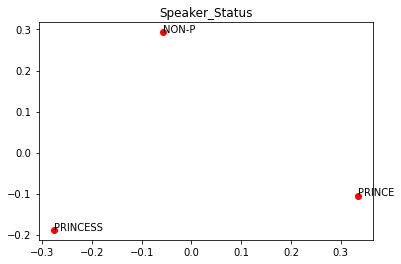

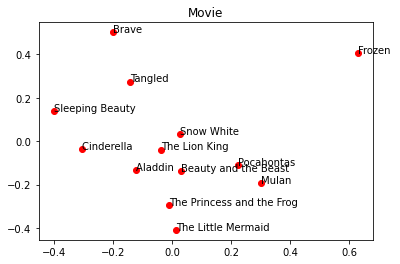

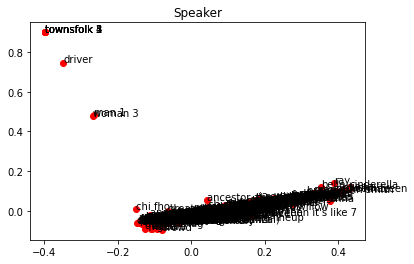

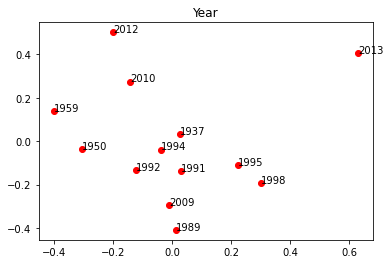

In [70]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")

stops = stopwords.words("english")
tfidf = TfidfVectorizer(
    analyzer="word",
    stop_words=stops
)

def tokenizer(texts):
    tokenized_texts = []
    for text in texts:
        doc = nlp(text[0])
        tokenized_text = ' '.join([token.lemma_ for token in doc])
        tokenized_texts.append(tokenized_text)
    return tokenized_texts


ds = pd.read_csv('dataset.csv')
for i in ds.columns[:-1]:
    grouped = ds.groupby(i).agg({'Text': lambda x: ' . '.join(x)})
    tokenized_texts = tokenizer(grouped.values)
    categories = grouped.axes[0]
    texts_tfidf = tfidf.fit_transform(tokenized_texts)
    pca = PCA(n_components=2)
    texts_tfidf = texts_tfidf.todense()
    coords = pca.fit_transform(texts_tfidf)
    plt.scatter(coords[:, 0], coords[:, 1], color='red')
    plt.title(i)
    for j, category in enumerate(categories):
        plt.annotate(category, xy=(coords[j, 0], coords[j, 1]))
    plt.show()

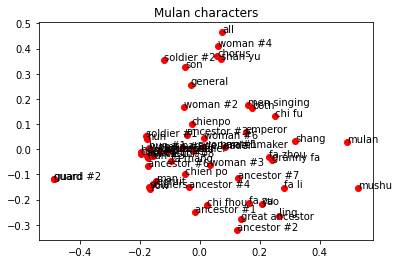

In [98]:
grouped = ds[ds["Movie"] == "Mulan "].groupby('Speaker').agg({'Text': lambda x: ' . '.join(x)})
tokenized_texts = tokenizer(grouped.values)
categories = grouped.axes[0]
texts_tfidf = tfidf.fit_transform(tokenized_texts)
pca = PCA(n_components=2)
texts_tfidf = texts_tfidf.todense()
coords = pca.fit_transform(texts_tfidf)
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Mulan characters')
for j, category in enumerate(categories):
    plt.annotate(category, xy=(coords[j, 0], coords[j, 1]))
plt.show()

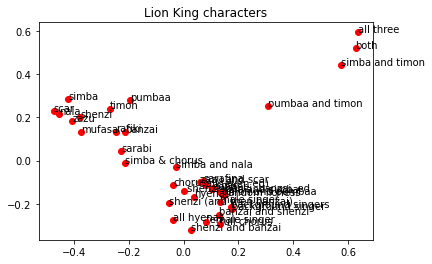

In [103]:
grouped = ds[ds["Movie"] == "The Lion King "].groupby('Speaker').agg({'Text': lambda x: ' . '.join(x)})
tokenized_texts = tokenizer(grouped.values)
categories = grouped.axes[0]
texts_tfidf = tfidf.fit_transform(tokenized_texts)
pca = PCA(n_components=2)
texts_tfidf = texts_tfidf.todense()
coords = pca.fit_transform(texts_tfidf)
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Lion King characters')
for j, category in enumerate(categories):
    plt.annotate(category, xy=(coords[j, 0], coords[j, 1]))
plt.show()

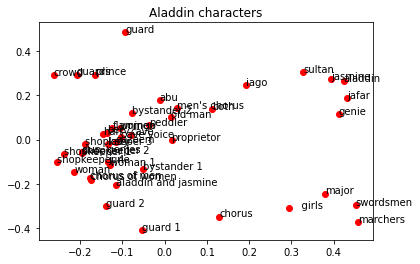

In [107]:
grouped = ds[ds["Movie"] == "Aladdin "].groupby('Speaker').agg({'Text': lambda x: ' . '.join(x)})
tokenized_texts = tokenizer(grouped.values)
categories = grouped.axes[0]
texts_tfidf = tfidf.fit_transform(tokenized_texts)
pca = PCA(n_components=2)
texts_tfidf = texts_tfidf.todense()
coords = pca.fit_transform(texts_tfidf)
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Aladdin characters')
for j, category in enumerate(categories):
    plt.annotate(category, xy=(coords[j, 0], coords[j, 1]))
plt.show()

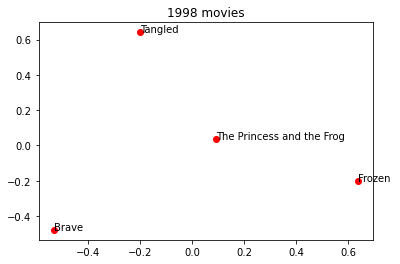

In [114]:
grouped = ds[ds['Year'] >= 2000].groupby('Movie').agg({'Text': lambda x: ' . '.join(x)})
tokenized_texts = tokenizer(grouped.values)
categories = grouped.axes[0]
texts_tfidf = tfidf.fit_transform(tokenized_texts)
pca = PCA(n_components=2)
texts_tfidf = texts_tfidf.todense()
coords = pca.fit_transform(texts_tfidf)
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('1998 movies')
for j, category in enumerate(categories):
    plt.annotate(category, xy=(coords[j, 0], coords[j, 1]))
plt.show()